In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [95]:
df = pd.read_csv('insurance.csv')
just_df = pd.read_csv('insurance.csv')

# df

In [96]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [97]:
type(pd.get_dummies(df["sex"]))

pandas.core.frame.DataFrame

In [98]:
toconc = [df,pd.get_dummies(df["sex"]),pd.get_dummies(df["smoker"]),pd.get_dummies(df["region"])]
df = pd.concat(toconc,axis=1)
df

,age,sex,bmi,children,smoker,region,expenses,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,female,27.9,0,yes,southwest,16884.92,1,0,0,1,0,0,0,1
1,18,male,33.8,1,no,southeast,1725.55,0,1,1,0,0,0,1,0
2,28,male,33.0,3,no,southeast,4449.46,0,1,1,0,0,0,1,0
3,33,male,22.7,0,no,northwest,21984.47,0,1,1,0,0,1,0,0
4,32,male,28.9,0,no,northwest,3866.86,0,1,1,0,0,1,0,0
5,31,female,25.7,0,no,southeast,3756.62,1,0,1,0,0,0,1,0
6,46,female,33.4,1,no,southeast,8240.59,1,0,1,0,0,0,1,0
7,37,female,27.7,3,no,northwest,7281.51,1,0,1,0,0,1,0,0
8,37,male,29.8,2,no,northeast,6406.41,0,1,1,0,1,0,0,0
9,60,female,25.8,0,no,northwest,28923.14,1,0,1,0,0,1,0,0


In [99]:
df.drop(["sex","smoker","region"], axis=1,inplace=True)
df

,age,bmi,children,expenses,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,27.9,0,16884.92,1,0,0,1,0,0,0,1
1,18,33.8,1,1725.55,0,1,1,0,0,0,1,0
2,28,33.0,3,4449.46,0,1,1,0,0,0,1,0
3,33,22.7,0,21984.47,0,1,1,0,0,1,0,0
4,32,28.9,0,3866.86,0,1,1,0,0,1,0,0
5,31,25.7,0,3756.62,1,0,1,0,0,0,1,0
6,46,33.4,1,8240.59,1,0,1,0,0,0,1,0
7,37,27.7,3,7281.51,1,0,1,0,0,1,0,0
8,37,29.8,2,6406.41,0,1,1,0,1,0,0,0
9,60,25.8,0,28923.14,1,0,1,0,0,1,0,0


In [100]:
normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df

,age,bmi,children,expenses,female,male,no,yes,northeast,northwest,southeast,southwest
0,0.021739,0.320755,0.0,0.251611,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,0.479784,0.2,0.009636,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.217391,0.458221,0.6,0.053115,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.326087,0.180593,0.0,0.333010,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.304348,0.347709,0.0,0.043816,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
5,0.282609,0.261456,0.0,0.042056,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,0.608696,0.469003,0.2,0.113629,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,0.413043,0.315364,0.6,0.098321,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8,0.413043,0.371968,0.4,0.084352,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
9,0.913043,0.264151,0.0,0.443766,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [101]:
test_frac = 0.3
test = df.sample(frac=test_frac)
test_x = pd.concat([pd.DataFrame(test.iloc[:,:3]),pd.DataFrame(test.iloc[:,4:])],axis=1)
test_y = pd.DataFrame(test.iloc[:,3])

train = df.loc[~(df.index.isin(test.index))]
train_x = pd.concat([pd.DataFrame(test.iloc[:,:3]),pd.DataFrame(test.iloc[:,4:])],axis=1)
train_y = pd.DataFrame(test.iloc[:,3])
print(df.shape, test.shape, train.shape)

nztest = normalized_df.sample(frac=test_frac)
nztest_x = pd.concat([pd.DataFrame(nztest.iloc[:,:3]),pd.DataFrame(nztest.iloc[:,4:])],axis=1)
nztest_y = pd.DataFrame(nztest.iloc[:,3])

nztrain = normalized_df.loc[~(normalized_df.index.isin(nztest.index))]
nztrain_x = pd.concat([pd.DataFrame(nztest.iloc[:,:3]),pd.DataFrame(nztest.iloc[:,4:])],axis=1)
nztrain_y = pd.DataFrame(nztest.iloc[:,3])
print(df.shape, nztest.shape, nztrain.shape)

(1338, 12) (401, 12) (937, 12)
(1338, 12) (401, 12) (937, 12)


In [102]:
m = sm.OLS(train_y,train_x)
model = m.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     153.0
Date:                Wed, 20 Feb 2019   Prob (F-statistic):          1.53e-115
Time:                        17:32:34   Log-Likelihood:                -4040.1
No. Observations:                 401   AIC:                             8098.
Df Residuals:                     392   BIC:                             8134.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          263.8270     21.022     12.550      0.0

In [103]:
op = model.predict(test_x)
mse_final = mean_squared_error(test_y,op)
print(mse_final)

33006755.873756375


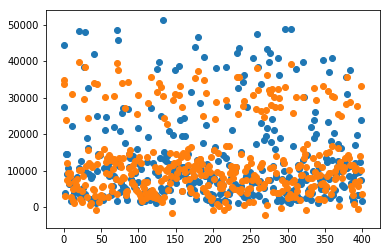

In [104]:
plt.scatter(list(range(test_y.shape[0])),test_y)
plt.scatter(list(range(test_y.shape[0])),op)
plt.show()

In [105]:
nzm = sm.OLS(nztrain_y,nztrain_x)
nzmodel = nzm.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     153.0
Date:                Wed, 20 Feb 2019   Prob (F-statistic):          1.53e-115
Time:                        17:32:34   Log-Likelihood:                -4040.1
No. Observations:                 401   AIC:                             8098.
Df Residuals:                     392   BIC:                             8134.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          263.8270     21.022     12.550      0.0

In [106]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [115]:
ar_tr_x = nztrain_x.values
ar_tr_y = nztrain_y.values
ar_tr_y

array([[5.94594672e-02],
       [1.81266736e-02],
       [3.88684113e-02],
       [3.32748271e-02],
       [4.88954575e-02],
       [6.23522711e-02],
       [9.89944541e-02],
       [2.39326012e-01],
       [1.69452897e-01],
       [8.98850668e-02],
       [1.41139557e-01],
       [1.53475196e-01],
       [2.54139441e-01],
       [4.37255062e-02],
       [3.94200601e-02],
       [6.96360778e-02],
       [6.37625190e-02],
       [8.22143398e-02],
       [1.36986389e-02],
       [1.72645628e-02],
       [2.93979143e-01],
       [5.79295039e-02],
       [2.63443725e-01],
       [6.38852673e-02],
       [1.44870050e-01],
       [2.19505444e-02],
       [8.76036097e-02],
       [1.58993439e-01],
       [1.56539592e-01],
       [1.80206856e-02],
       [1.25177498e-01],
       [1.25205272e-01],
       [2.34753201e-01],
       [2.16941938e-02],
       [6.80250272e-02],
       [1.78965965e-01],
       [6.54281439e-01],
       [1.90354894e-01],
       [1.60315736e-01],
       [6.72522242e-01],


In [113]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(ar_tr_x, ar_tr_y)
# summarize score
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(ar_tr_x)
# summarize selected features
print(features[0:5,:])

ValueError: Unknown label type: (array([[5.94594672e-02],
       [1.81266736e-02],
       [3.88684113e-02],
       [3.32748271e-02],
       [4.88954575e-02],
       [6.23522711e-02],
       [9.89944541e-02],
       [2.39326012e-01],
       [1.69452897e-01],
       [8.98850668e-02],
       [1.41139557e-01],
       [1.53475196e-01],
       [2.54139441e-01],
       [4.37255062e-02],
       [3.94200601e-02],
       [6.96360778e-02],
       [6.37625190e-02],
       [8.22143398e-02],
       [1.36986389e-02],
       [1.72645628e-02],
       [2.93979143e-01],
       [5.79295039e-02],
       [2.63443725e-01],
       [6.38852673e-02],
       [1.44870050e-01],
       [2.19505444e-02],
       [8.76036097e-02],
       [1.58993439e-01],
       [1.56539592e-01],
       [1.80206856e-02],
       [1.25177498e-01],
       [1.25205272e-01],
       [2.34753201e-01],
       [2.16941938e-02],
       [6.80250272e-02],
       [1.78965965e-01],
       [6.54281439e-01],
       [1.90354894e-01],
       [1.60315736e-01],
       [6.72522242e-01],
       [4.98290783e-02],
       [6.79279779e-02],
       [7.27810663e-01],
       [5.29835003e-02],
       [5.37675567e-01],
       [1.71528284e-02],
       [5.28671369e-02],
       [1.34738292e-01],
       [8.35918655e-02],
       [1.39494986e-01],
       [1.11651569e-01],
       [1.39798904e-01],
       [2.88798976e-01],
       [1.08756211e-01],
       [1.15127786e-01],
       [2.34623589e-01],
       [9.62639844e-02],
       [1.13509872e-01],
       [1.71122369e-01],
       [1.88802424e-01],
       [1.96224303e-01],
       [2.79759822e-01],
       [1.72752893e-01],
       [4.21590536e-01],
       [1.61720397e-01],
       [2.93703479e-01],
       [6.36124597e-01],
       [8.69796528e-02],
       [3.00771159e-01],
       [1.96467405e-01],
       [1.18323550e-01],
       [1.60082051e-01],
       [4.61969278e-01],
       [1.35742146e-01],
       [2.21628558e-01],
       [4.63906433e-01],
       [1.89301717e-01],
       [6.62474924e-02],
       [6.66176046e-01],
       [6.58304038e-02],
       [5.77000972e-01],
       [2.19724125e-02],
       [8.73386395e-02],
       [5.28858125e-02],
       [3.11090949e-02],
       [3.58290757e-01],
       [1.55251134e-01],
       [1.06431337e-01],
       [1.46904254e-01],
       [3.26518279e-02],
       [9.74699179e-02],
       [8.28732536e-02],
       [4.11895182e-01],
       [5.28857806e-01],
       [3.75034957e-02],
       [6.37083279e-01],
       [1.22278948e-01],
       [6.64638261e-01],
       [6.68197162e-01],
       [2.72891987e-01],
       [1.65017360e-02],
       [3.99112126e-01],
       [1.48997838e-02],
       [8.18374756e-03],
       [1.30348726e-01],
       [1.16621994e-01],
       [7.22738080e-02],
       [1.43447830e-02],
       [3.13241358e-01],
       [5.70094508e-01],
       [6.00564323e-01],
       [1.03779720e-01],
       [2.25671588e-03],
       [1.04033516e-01],
       [3.11394388e-01],
       [1.18403360e-01],
       [4.24629393e-01],
       [1.11774955e-01],
       [1.10877568e-01],
       [1.29301136e-01],
       [1.15129861e-01],
       [4.51014357e-02],
       [5.23216815e-01],
       [8.21550567e-01],
       [8.44761635e-02],
       [1.68173857e-01],
       [7.59022873e-01],
       [1.13287999e-01],
       [1.60286206e-01],
       [1.39533933e-01],
       [1.85467950e-01],
       [6.31815001e-02],
       [1.74345109e-01],
       [3.62576570e-02],
       [9.61393207e-02],
       [3.05082511e-01],
       [1.38535028e-01],
       [1.91065844e-03],
       [9.14514236e-03],
       [1.90268539e-01],
       [6.91187954e-01],
       [6.82769245e-01],
       [2.21338846e-01],
       [7.30738264e-02],
       [1.43966118e-01],
       [1.73046276e-02],
       [1.37316165e-01],
       [2.95658831e-02],
       [2.78577832e-02],
       [1.63965461e-01],
       [2.84932806e-01],
       [6.20628152e-01],
       [9.12311472e-02],
       [5.27456657e-01],
       [2.93600843e-01],
       [6.57461241e-02],
       [5.85932861e-01],
       [3.96991567e-01],
       [2.56299746e-01],
       [5.43924713e-02],
       [1.75318475e-01],
       [1.77195294e-01],
       [2.15720840e-02],
       [1.10061428e-01],
       [2.09313670e-01],
       [8.41476644e-02],
       [2.12362423e-01],
       [6.14377888e-01],
       [1.71802832e-02],
       [1.15030577e-02],
       [2.23676330e-02],
       [7.97403803e-02],
       [6.42741030e-02],
       [8.66720640e-02],
       [3.28106664e-01],
       [5.31151873e-02],
       [3.37848148e-02],
       [1.25245656e-01],
       [3.88955468e-02],
       [1.39728830e-01],
       [1.97114347e-01],
       [3.18868941e-01],
       [1.04214686e-01],
       [5.34664644e-01],
       [5.66895712e-02],
       [6.35458501e-01],
       [1.63465689e-01],
       [7.61431388e-01],
       [3.20866274e-01],
       [1.10790894e-01],
       [3.91978842e-01],
       [2.03760948e-01],
       [1.91668093e-01],
       [4.12216977e-02],
       [4.28093160e-01],
       [1.96909394e-01],
       [2.11856905e-01],
       [2.35585622e-02],
       [9.73832439e-02],
       [4.39435479e-04],
       [1.35610300e-01],
       [9.61752353e-02],
       [5.23326953e-01],
       [3.56209305e-02],
       [5.38192737e-01],
       [5.04597711e-01],
       [4.47558571e-02],
       [1.61897895e-01],
       [7.17255113e-02],
       [1.69854343e-01],
       [1.95219651e-01],
       [1.72688726e-02],
       [1.62453375e-01],
       [9.66774017e-03],
       [2.05579506e-01],
       [1.88420931e-02],
       [7.74951571e-02],
       [8.36271416e-02],
       [9.83205360e-02],
       [8.08068055e-02],
       [2.79118786e-01],
       [3.28601328e-02],
       [1.99437784e-01],
       [2.96859497e-01],
       [1.19083823e-01],
       [5.20816759e-01],
       [2.59222239e-01],
       [3.53831916e-01],
       [1.66714606e-01],
       [1.20269325e-02],
       [9.62387643e-02],
       [6.21019861e-02],
       [1.22930359e-01],
       [5.60228998e-01],
       [1.71125242e-01],
       [1.56621317e-02],
       [2.73547389e-01],
       [1.81919584e-02],
       [6.58323192e-03],
       [0.00000000e+00],
       [5.86412521e-02],
       [8.54311735e-02],
       [8.08230868e-02],
       [2.33588769e-02],
       [1.29733708e-01],
       [1.43083576e-01],
       [3.72787659e-01],
       [9.17007510e-01],
       [3.03717276e-01],
       [2.74369754e-01],
       [1.54354545e-01],
       [2.03661186e-01],
       [1.54602436e-01],
       [5.96817549e-01],
       [1.79178899e-01],
       [8.82807203e-02],
       [2.13138339e-01],
       [6.39017082e-02],
       [1.93064613e-01],
       [7.52555206e-02],
       [5.43119586e-01],
       [4.30432878e-03],
       [1.02234433e-01],
       [4.18591744e-01],
       [1.66269584e-01],
       [8.84748189e-02],
       [1.64806661e-02],
       [7.99209112e-02],
       [1.58843396e-01],
       [5.58715156e-01],
       [4.56532441e-02],
       [1.83680200e-01],
       [2.44759656e-01],
       [1.05429079e-01],
       [4.89594653e-02],
       [1.64010633e-01],
       [4.47968956e-01],
       [9.65942394e-02],
       [2.24586168e-04],
       [9.35584154e-03],
       [1.56490429e-02],
       [3.77097255e-02],
       [6.93893044e-02],
       [1.68180242e-01],
       [2.97333410e-01],
       [1.57123803e-01],
       [3.27927729e-02],
       [4.42895894e-01],
       [1.31783237e-01],
       [2.46847334e-01],
       [1.83095350e-01],
       [5.77251895e-02],
       [3.75903133e-01],
       [1.09573309e-01],
       [1.80516200e-01],
       [3.36739424e-01],
       [1.21492976e-01],
       [1.73320823e-02],
       [1.30614814e-01],
       [9.62780310e-02],
       [1.50966598e-01],
       [3.00271706e-01],
       [2.02732992e-01],
       [5.31823716e-01],
       [3.58206956e-01],
       [1.14268389e-01],
       [1.01753336e-02],
       [9.01588161e-02],
       [1.45139330e-01],
       [1.25403042e-01],
       [6.08607764e-02],
       [5.14800340e-02],
       [1.22959251e-01],
       [8.13985190e-03],
       [1.00507498e-01],
       [1.78808100e-01],
       [3.49947389e-01],
       [2.42239885e-01],
       [2.10810911e-03],
       [1.16855040e-01],
       [2.55497652e-01],
       [1.69514830e-01],
       [1.95833551e-01],
       [5.82386251e-01],
       [5.31940399e-02],
       [1.12120694e-02],
       [1.83952193e-01],
       [1.05509049e-01],
       [6.83165104e-01],
       [1.71213353e-01],
       [3.03269540e-02],
       [1.28001027e-01],
       [2.31928715e-04],
       [7.14163901e-01],
       [4.68685952e-02],
       [1.00874306e-01],
       [6.55402135e-03],
       [9.30082032e-02],
       [1.02095882e-01],
       [8.51414622e-02],
       [1.75706193e-01],
       [9.46254790e-02],
       [1.59041485e-01],
       [1.83907020e-01],
       [1.75196365e-02],
       [2.55305150e-02],
       [1.28845260e-01],
       [1.85305616e-01],
       [4.00882478e-01],
       [5.41871992e-01],
       [1.12527726e-02],
       [2.51833402e-02],
       [1.57917437e-01],
       [7.37182786e-01],
       [7.57037512e-01],
       [6.18527066e-01],
       [5.38029605e-01],
       [1.11128652e-01],
       [5.50271547e-01],
       [3.58316296e-02],
       [9.77187664e-02],
       [2.12834421e-01],
       [7.19555565e-01],
       [6.71009836e-02],
       [1.39681263e-01],
       [5.48612291e-01],
       [5.16374199e-01],
       [6.22233296e-01],
       [2.50323391e-02],
       [2.78413422e-02],
       [2.66117849e-02],
       [2.67885806e-01],
       [3.79788139e-01],
       [7.19663788e-02],
       [6.92143602e-02],
       [3.79695878e-02],
       [5.39962930e-02],
       [2.08922120e-01],
       [3.79066494e-01],
       [4.10473920e-02],
       [1.99294285e-01],
       [3.50264236e-01],
       [8.23701295e-02],
       [1.88787899e-01],
       [3.27180705e-02],
       [2.10571161e-01],
       [3.38550479e-01],
       [8.83008325e-02],
       [1.45408450e-01],
       [4.13083876e-01],
       [5.35531543e-01],
       [3.12094963e-02],
       [3.29608055e-01],
       [9.80049661e-02],
       [4.02757861e-02],
       [9.53844749e-03],
       [4.44425219e-02],
       [1.14187780e-02],
       [1.74153404e-01],
       [8.74479797e-02],
       [8.26339823e-03]]),)